In [4]:
# Chances of Recovery

# Age is inversely proportional to Recovery.

# Chances of Recovery = Recovered Count / Death Count * (1 / (Country's Median Age/100))

In [2]:
import pandas as pd
import json
df = pd.read_csv('../covid19/data/median_age.tsv', delimiter="|", header=0)

median_age = {}
for row in df.iterrows():
    v = row[1].values
    median_age[v[1].strip()] =v[2]

max_median_age = max(list(median_age.values()))
print("Max median age: ", max_median_age)
json.dump(median_age, open("../covid19/data/median_age.json", 'w'), indent=2)


Max median age:  55.4


In [3]:
import requests

r = requests.get("https://bing.com/covid/data")
data = json.loads(r.content)

In [5]:
chance_of_recovery = {}

for area in data['areas']:
    try:
        chance_of_recovery[area['displayName']] = {
            "confirmed":area["totalConfirmed"],
            "deaths":area["totalDeaths"],
            "recovered":area["totalRecovered"],
            "median_age":median_age[area['displayName']]
        }
    except :
        print("Not found: ", area['displayName'],  "-----"*24)

Not found:  Réunion ------------------------------------------------------------------------------------------------------------------------
Not found:  Palestinian Authority ------------------------------------------------------------------------------------------------------------------------
Not found:  Mayotte ------------------------------------------------------------------------------------------------------------------------
Not found:  Congo (DRC) ------------------------------------------------------------------------------------------------------------------------
Not found:  Martinique ------------------------------------------------------------------------------------------------------------------------
Not found:  Guadeloupe ------------------------------------------------------------------------------------------------------------------------
Not found:  French Guiana --------------------------------------------------------------------------------------------------------

In [5]:
chance_of_recovery_stats = {}

for country, country_data in chance_of_recovery.items():
    try:
        chance_of_recovery_stats[country] = (country_data['recovered']/country_data['deaths']) * (1/(country_data['median_age']/max_median_age))
    except:
        pass

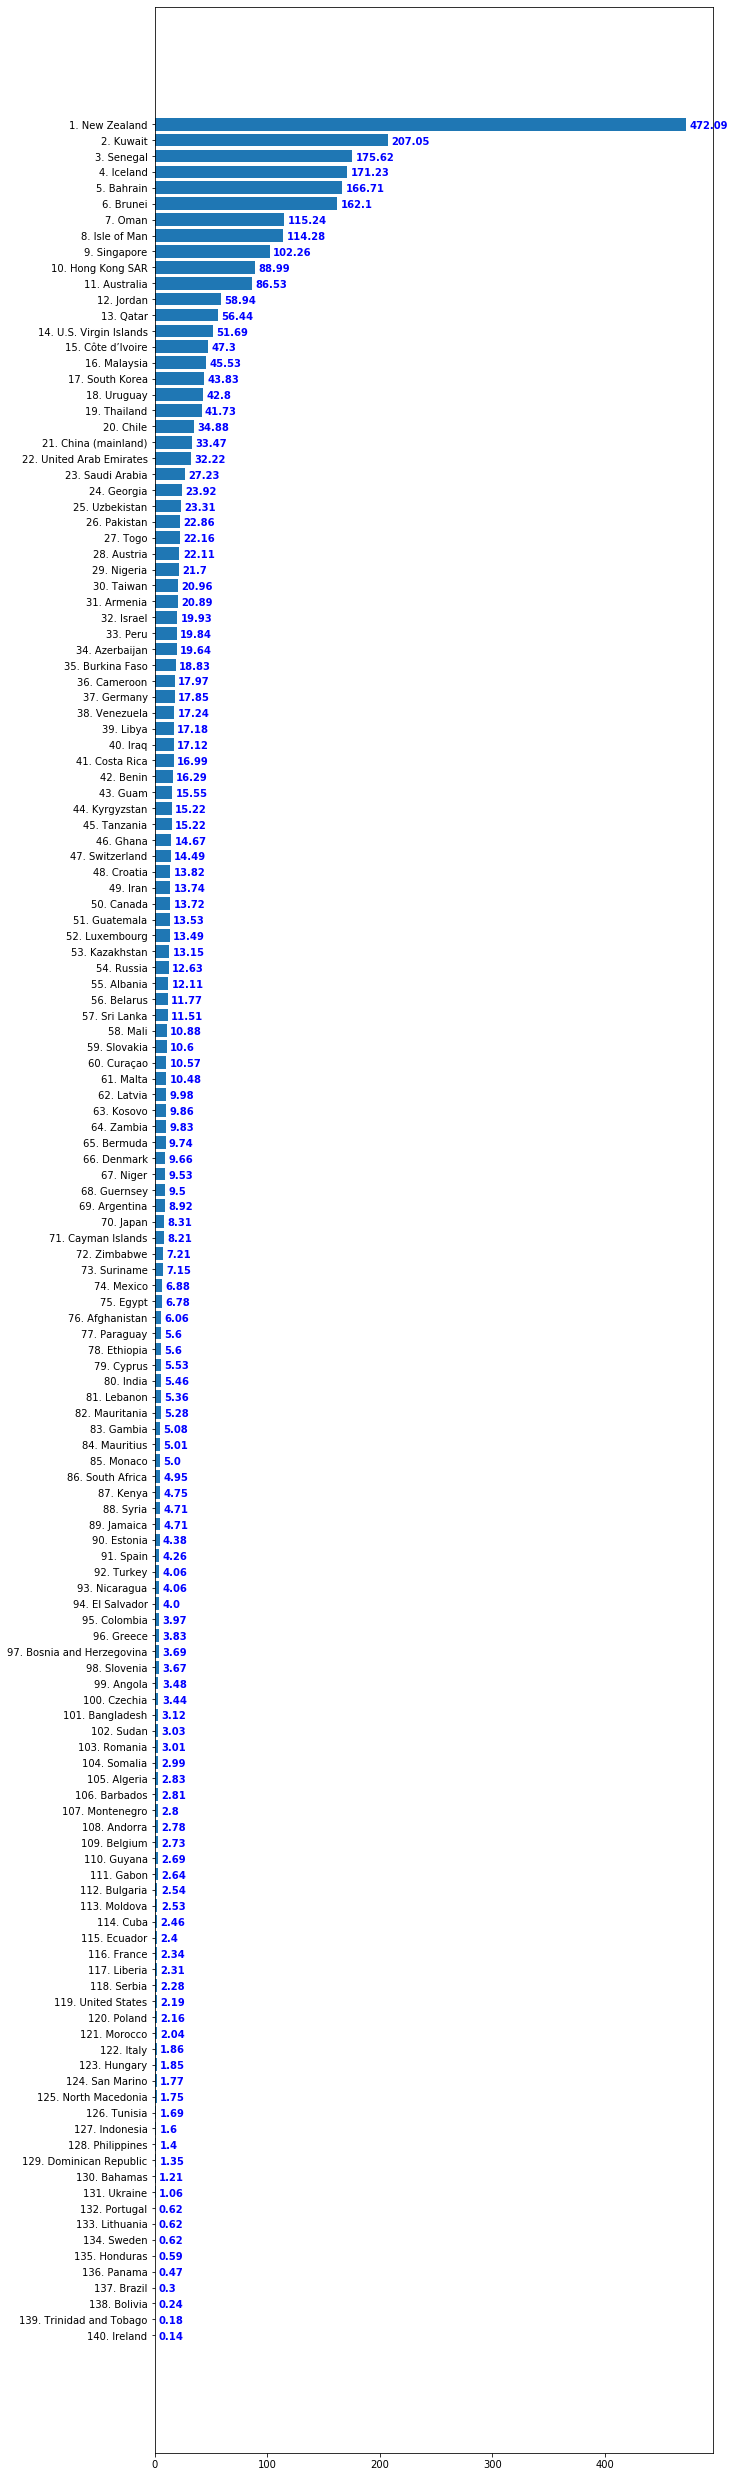

In [16]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import os
chance_of_recovery_stats_sorted = OrderedDict(sorted(chance_of_recovery_stats.items(), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(10,45))
x = list(chance_of_recovery_stats_sorted.keys())
x = [f"{e+1}. {i}"for e,i in enumerate(x)][::-1]

y = list(chance_of_recovery_stats_sorted.values())[::-1]
plt.barh(x,y)
for i, v in enumerate(y):
    plt.text(v + 3, i-0.25, str(round(v,2)), color='blue', fontweight='bold')
    
plt.savefig(os.path.join('chaces_of_recovery_factor.png'), dpi=300, format='png', bbox_inches='tight')

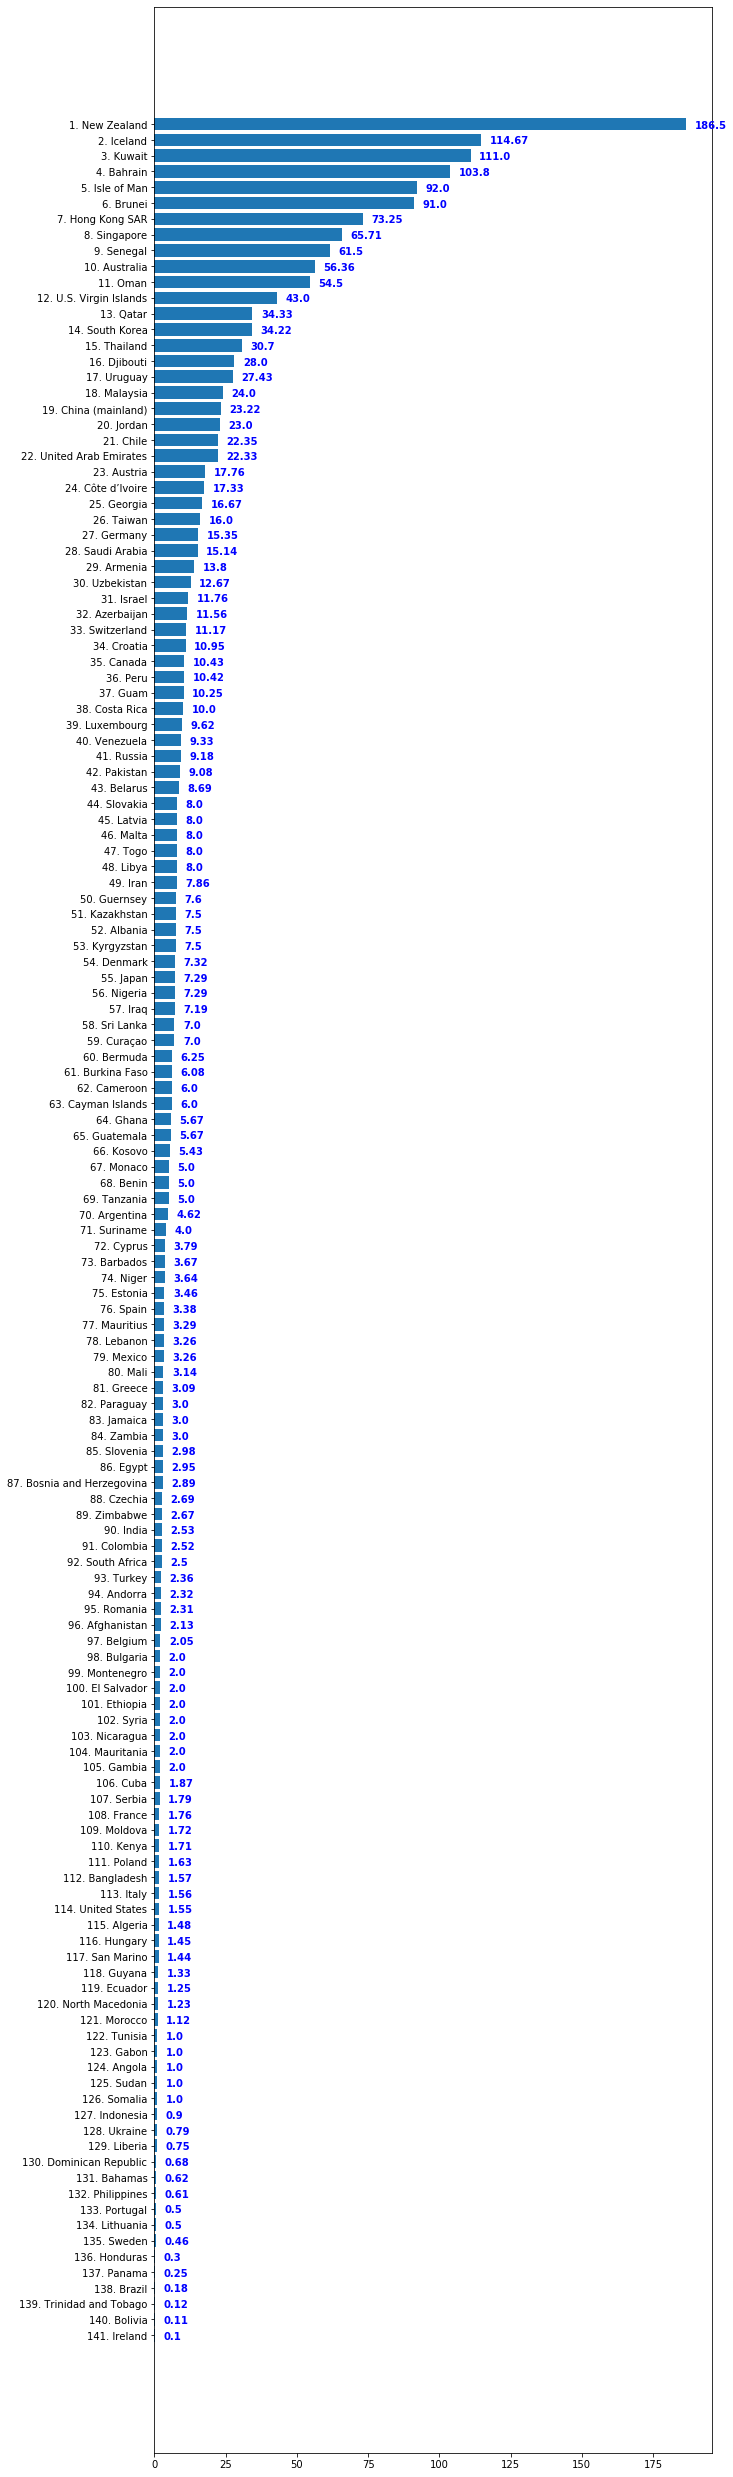

In [6]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import os

chance_of_recovery_stats = {}

for country, country_data in chance_of_recovery.items():
    try:
        chance_of_recovery_stats[country] = (country_data['recovered']/country_data['deaths'])
    except:
        pass

chance_of_recovery_stats_sorted = OrderedDict(sorted(chance_of_recovery_stats.items(), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(10,45))
x = list(chance_of_recovery_stats_sorted.keys())
x = [f"{e+1}. {i}"for e,i in enumerate(x)][::-1]

y = list(chance_of_recovery_stats_sorted.values())[::-1]
plt.barh(x,y)
for i, v in enumerate(y):
    plt.text(v + 3, i-0.25, str(round(v,2)), color='blue', fontweight='bold')
    
plt.savefig(os.path.join('chaces_of_recovery_factor_without_age.png'), dpi=300, format='png', bbox_inches='tight')

In [21]:
import pandas as pd
import json
df = pd.read_csv('../covid19/data/Religious_Composition_by_Country_2020_percentage.csv', header=0)

def formatter(x):
    if '<' in x:
        return float(x.split("<")[1].strip())
    elif '>' in x:
        return float(x.split(">")[1].strip())
    else:
        return float(x.strip())

country_rel_data ={}
for cdn in df.iterrows():
    cdn = cdn[1]
    country_rel_data[cdn['Country'].strip()]={
        "Buddhists":formatter(cdn['Buddhists']),
        "Christians":formatter(cdn['Christians']),
        "Folk Religions":formatter(cdn['Folk Religions']),
        "Hindus":formatter(cdn['Hindus']),
        "Jews":formatter(cdn['Jews']),
        "Muslims":formatter(cdn['Muslims']),
        "Other Religions":formatter(cdn['Other Religions']),
        "Unaffiliated":formatter(cdn['Unaffiliated']),
    }

json.dump(country_rel_data, open('../covid19/data/country_religion_composition.json', 'w'), indent=2)



In [32]:
import requests

country_rel_data= json.load(open('../covid19/data/country_religion_composition.json'))
response = requests.get(" https://corona-api.com/countries")
covid = json.loads(response.content)

for country in covid["data"]:
    try:
        if country['name'] not in country_rel_data:
            print(country['name'])




Åland Islands
Antarctica
Bosnia and Herzegovina
Brunei Darussalam
Bonaire, Sint Eustatius and Saba
British Indian Ocean Territory
Bolivia, Plurinational State of
Bouvet Island
Cocos (Keeling) Islands
Curaçao
Christmas Island
Côte d'Ivoire
Czechia
Faroe Islands
French Southern Territories
Holy See (Vatican City State)
Guernsey
Heard Island and McDonald Islands
Jersey
Lao People's Democratic Republic
Macedonia, the Former Yugoslav Republic of
Moldova, Republic of
Norfolk Island
Saint Lucia
Svalbard and Jan Mayen
Saint Martin (French part)
Micronesia, Federated States of
Pitcairn
Réunion
Saint Helena, Ascension and Tristan da Cunha
Saint Vincent and the Grenadines
Sint Maarten (Dutch part)
Saint Kitts and Nevis
South Georgia and the South Sandwich Islands
United States Minor Outlying Islands
Palestine, State of
Saint Barthélemy
Saint Pierre and Miquelon
